# Hypothesis 3: Number of service request will increase with population

by Tanvir Khan

### Import Libraries & Dependancies

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from pprint import pprint
import datetime
import gmaps
from scipy.stats import linregress
#import matplotlib.cm as cm
from numpy.random import rand
import scipy.stats as stats

pd.options.display.float_format = '{:,.2f}'.format


### Final Correct Data Constructed

In [2]:
# Read & load final_df.csv file that contains 311 cases and Census data from 2017 and above
final_df = pd.read_csv('final_df.csv')
final_df.head()

,Unnamed: 0,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.76,-122.41,Web,NaN,01/23/2019,2019,94110,"73,737.00",36.60,"109,747.00","59,660.00","7,321.00",9.93
1,1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.76,-122.42,Web,NaN,01/01/2020,2020,94110,"73,737.00",36.60,"109,747.00","59,660.00","7,321.00",9.93
2,2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.76,-122.41,Integrated Agency,NaN,07/05/2019,2019,94110,"73,737.00",36.60,"109,747.00","59,660.00","7,321.00",9.93
3,3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.76,-122.42,Integrated Agency,NaN,08/07/2019,2019,94110,"73,737.00",36.60,"109,747.00","59,660.00","7,321.00",9.93
4,4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.77,-122.42,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,"73,737.00",36.60,"109,747.00","59,660.00","7,321.00",9.93


In [3]:
#final_df.count()

### Hypotheis: 3

#### Number of 311 Requests by Zip Code

In [4]:
request_by_zip__count = final_df.groupby('Zipcode')['CaseID'].count().sort_values(ascending=False)
service = request_by_zip__count[request_by_zip__count > 0]
request_by_zip__count.sort_index(inplace=True)
request_by_zip__count.head()
request_by_zip__count.nlargest(3)
# request_by_zip__count.describe()

Zipcode
94110    283725
94103    190955
94102    171629
Name: CaseID, dtype: int64

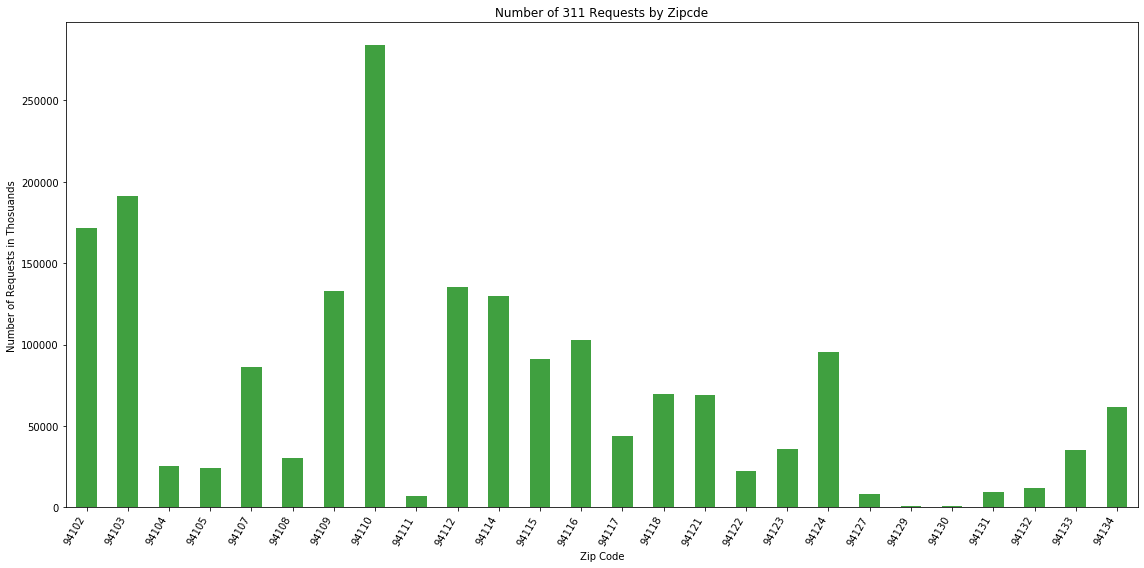

In [5]:
# Bar Graph Number of Requests for each Zipcode
fig, ax = plt.subplots(figsize=[16, 8])
request_by_zip__count_plt = request_by_zip__count.plot(kind='bar', color='green',alpha =0.75)
plt.xlabel('Zip Code')
plt.ylabel('Number of Requests in Thosuands')
plt.title('Number of 311 Requests by Zipcde')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.savefig("Number_of_311_Requests_ by_Zipcode(10).png")

#### Population Numbers by Zip Code


In [6]:
zip_population = final_df.groupby('Zipcode')['Population'].mean().sort_values(ascending=False)
zip_population.sort_index(inplace=True)
zip_population.head()
zip_population.nlargest(3)
#zip_population.describe()

Zipcode
94112   85,373.00
94110   73,737.00
94122   62,516.00
Name: Population, dtype: float64

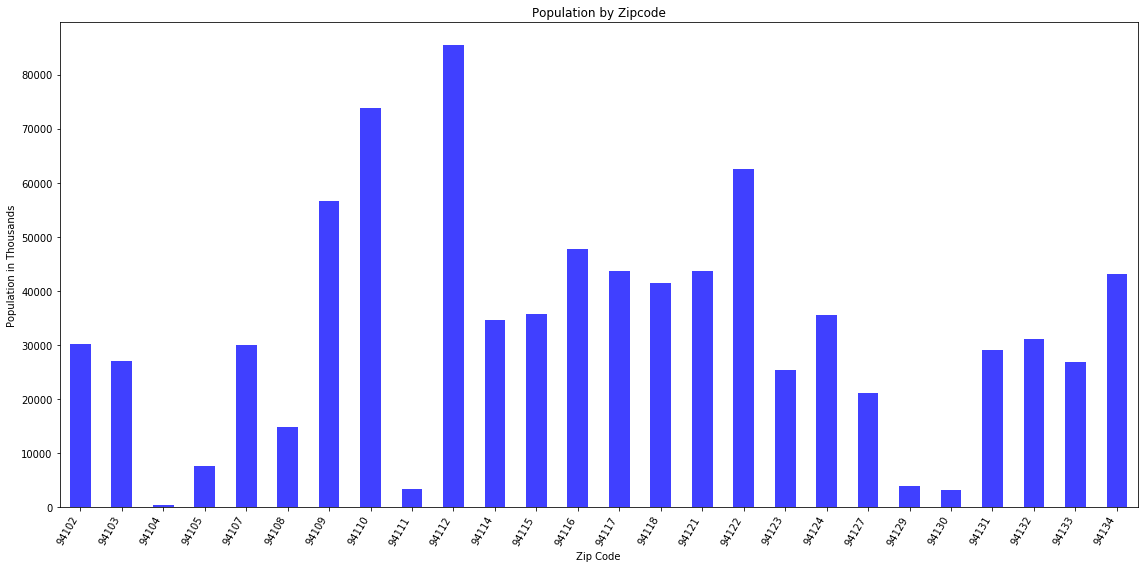

In [7]:
# Bar Graph Population Numbers for each Zipcode
fig, ax = plt.subplots(figsize=[16, 8])
zip_pop_plt = zip_population.plot(kind='bar', color='blue',alpha =0.75)
plt.xlabel('Zip Code')
plt.ylabel('Population in Thousands')
plt.title('Population by Zipcode')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

plt.savefig("Population_by_each_Zipcode(10).png")

### Data Visualization

#### Location of Requests, Population Numbers, Income, Neighborhood by Zip code on Google Heatmap

In [8]:

coordinates= final_df.groupby('Zipcode')[['Latitude','Longitude']].mean().dropna()
coordinates

request_by_zip__count = final_df.groupby('Zipcode')['CaseID'].count().sort_values(ascending=False)
request_by_zip__count.sort_index(inplace=True)
request_by_zip__count


from config import g_key
gmaps.configure(api_key=g_key)
heat_map = gmaps.heatmap_layer(coordinates,weights=request_by_zip__count,point_radius=50,opacity=.5)
fig = gmaps.figure()
fig.add_layer(heat_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
groupby_zipcode = final_df.groupby('Zipcode').head(1)
groupby_zipcode.sort_values('Zipcode', inplace=True)
groupby_zipcode['Request Count'] = request_by_zip__count.values
groupby_zipcode.head()

C:\Users\h_23m\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\h_23m\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Request Count
743749,743749,10478416,02/12/2019 08:01:00 AM,Street Defects,Pavement_Defect,Downtown / Union Square,37.78,-122.41,Mobile/Open311,http://mobile311.sfgov.org/reports/10478416/ph...,02/12/2019,2019,94102,"30,140.00",41.50,"33,552.00","43,488.00","6,957.00",23.08,171629
1072573,1072573,11142940,07/17/2019 04:10:27 PM,Sidewalk or Curb,Curb_or_Curb_Ramp_Defect,South of Market,37.78,-122.41,Web,http://mobile311.sfgov.org/reports/11142940/ph...,07/17/2019,2019,94103,"26,990.00",38.80,"49,052.00","55,807.00","5,870.00",21.75,190955
951503,951503,10919714,05/28/2019 01:52:59 PM,Sidewalk or Curb,Sidewalk_Defect,Financial District,37.79,-122.40,Mobile/Open311,http://mobile311.sfgov.org/reports/10919714/ph...,05/28/2019,2019,94104,436.00,51.30,"48,429.00","64,267.00",84.00,19.27,25598
1738971,1738971,11200413,07/30/2019 10:41:00 AM,Street Defects,Pavement_Defect,South Beach,37.78,-122.39,Phone,NaN,07/30/2019,2019,94105,"7,675.00",37.60,"199,364.00","154,723.00",733.00,9.55,24142
1418681,1418681,11204343,07/31/2019 07:43:52 AM,Sidewalk or Curb,Sidewalk_Defect,Potrero Hill,37.76,-122.40,Web,NaN,07/31/2019,2019,94107,"29,920.00",35.90,"143,467.00","87,735.00","3,391.00",11.33,86295


In [10]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Neighborhood</dt><dd>{Neighborhood}</dd>
<dt>Population</dt><dd>{Population}</dd>
<dt>Income</dt><dd>{Per Capita Income}</dd>
<dt>Zipcode</dt><dd>{Zipcode}</dd>
<dt>Request Count</dt><dd>{Request Count}</dd>
</dl>
"""
# For neighborhood Info to pop on Info box we need to perform iterows sice its string
nbh_info = [info_box_template.format(**row) for index, row in groupby_zipcode.iterrows()]
locations = groupby_zipcode[["Latitude", "Longitude"]]

# Add marker layer with Info box:
marker_layer = gmaps.marker_layer(locations, hover_text='', label='', info_box_content=nbh_info)

#fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
plt.savefig("Neighborhood_Heatmap.png")

# Display Map
fig


Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

### Statistical Analysis & Testing Hypothesis

#### Is there any correlation between the number of requests and population

Correlation Coefficient =  0.60149
Correlation Determinant =  0.36179
p-value =  0.00115


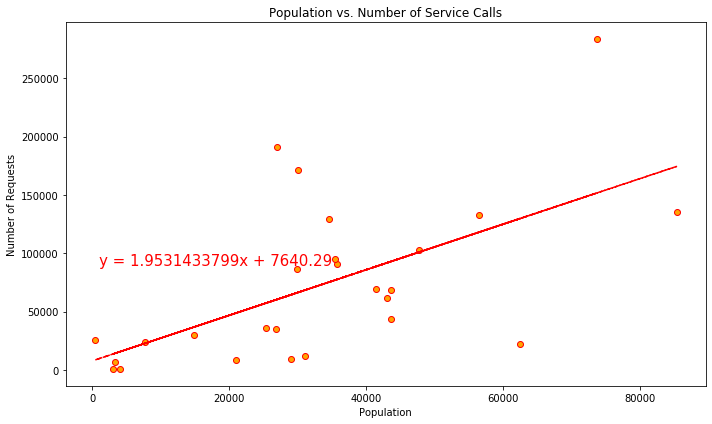

In [11]:
# Testing goodness of fit & Pearson Coefficient
slope, intercept, r_value, p_value,_ = linregress(zip_population, request_by_zip__count)
fit = slope * zip_population + intercept
line_eq = "y = " + str(round(slope,10)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[10, 6])
plt.scatter(zip_population,request_by_zip__count,color='orange', edgecolor='r')
plt.plot(zip_population, fit, color='red', linestyle='dashed')
print(f'Correlation Coefficient = ','{0:.5f}'.format(r_value))
print(f'Correlation Determinant = ','{0:.5f}'.format(r_value**2))
print(f'p-value = ','{0:.5f}'.format(p_value))
plt.annotate(line_eq,(1000,90000),fontsize=15,color="red")
plt.xlabel("Population")
plt.ylabel("Number of Requests")
plt.title("Population vs. Number of Service Calls")
plt.tight_layout()

plt.savefig("Relation_NumOfRequests_vs_Population.png")


#### Hypothesis Test: How correct our assumption is? Is it signicant at 5% significance level?
* HA = If there are higher number of population then the more number of service requests in that zipcode
* H0 = The number of requests in a zipcode is not related to the number of population

In [12]:
import scipy.stats as stats

stats.f_oneway(request_by_zip__count, zip_population)


F_onewayResult(statistic=7.537305359735442, pvalue=0.008374915497904369)

### Conclusion

Result: Since p-value is very small 0.00837 ( ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. We found our hypothesis(assumption) is statistically significant at 5% significance level and were able to reject the null.

Conclusion:
From the bar plots, google heat maps, linear modeling, and statistical analysis shows the validity of our model and hence our hypothesis assumption is correct, if the population number is higher, then the number of service requests/complaints is higher in that Zip code.
